In [153]:
from scipy.linalg import solve
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [154]:
xs_obs = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5,
                  6, 6.5, 7, 7.5, 8, 8.5], dtype='float')
xs = np.linspace(1, 61, num=100)
ys = np.array(
    [
        14,
        18.222,
        18,
        17.216,
        16.444,
        15.778,
        15.219,
        14.749,
        14.352,
        14.014,
        13.722,
        13.469,
        13.248,
        13.052,
        12.979,
        12.729,
    ],
    dtype='float'
)

In [155]:
def get_x_powers(x, n):
    xs = []
    for i in range(n):
        xs.append(1/x**i)
    return np.array(xs)


/tmp/ipykernel_334641/1296549975.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a_arr = np.array(
/tmp/ipykernel_334641/1296549975.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b_arr = np.array([
/tmp/ipykernel_334641/1296549975.py:39: LinAlgWarning: Ill-conditioned matrix (rcond=9.25049e-19): result may not be accurate.
  wi = solve(a, b)


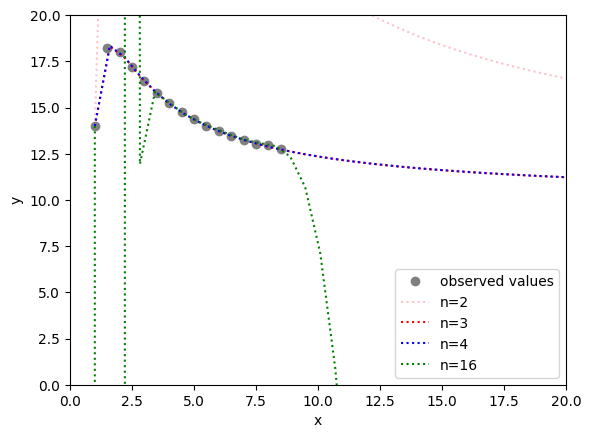

In [156]:
x_mod_5 = [x for i, x in enumerate(xs_obs) if i % 5 == 0]
x_mod_2 = [x for i, x in enumerate(xs_obs) if i % 2 == 0]
x_n_3 = [xs_obs[0], xs_obs[4], xs_obs[9], xs_obs[15],]


a_arr = np.array(
    [
        [
            [1, 1],
            [1, 1/61],
        ],
        [   
            [1, 1, 1],
            [1, 1/33, 1/33**2],
            [1, 1/61, 1/61**2],
        ],
        [get_x_powers(x, len(x_n_3)) for x in x_n_3],
        [get_x_powers(x, len(x_mod_5)) for x in x_mod_5],
        [get_x_powers(x, len(x_mod_2)) for x in x_mod_2],
        [get_x_powers(x, len(xs_obs)) for x in xs_obs],
    ]

)
b_arr = np.array([
    [ys[0], ys[-1]],
    [ys[0], ys[8], ys[-1]],
    [ys[0], ys[4], ys[9], ys[15],],
    [y for i, y in enumerate(ys) if i % 5 == 0],
    [y for i, y in enumerate(ys) if i % 2 == 0],
    ys

])

ys_approximated_arr = []
wi_arr = []

plt.plot(xs_obs, ys, 'o', color='gray', label='observed values')
for a, b in zip(a_arr, b_arr):
    wi = solve(a, b)
    wi_arr.append(wi)
    xs_powers = np.array([get_x_powers(x, len(wi)) for x in xs])
    ys_approximated = np.array([sum(x*wi) for x in xs_powers])

    ys_approximated_arr.append(ys_approximated)

plt.xlim((0, 20))
plt.ylim((0, 20))
plt.xlabel('x')
plt.ylabel('y')

# plt.plot(xs, ys_approximated_arr[0], '-', color='gray', label='n=1')
plt.plot(xs, ys_approximated_arr[1], ':', color='pink', label='n=2')
plt.plot(xs, ys_approximated_arr[2], ':', color='red', label='n=3')
plt.plot(xs, ys_approximated_arr[3], ':', color='blue', label='n=4')
# plt.plot(xs, ys_approximated_arr[4], ':', color='black', label='n=8')
plt.plot(xs, ys_approximated_arr[5], ':', color='green', label='n=16')
plt.legend()



In [157]:
def f(x, b):
    return sum(get_x_powers(x, len(b))*b)

In [158]:
for i, wi in enumerate(wi_arr):
    obs_values = []
    for x in xs_obs:
        obs_values.append(f(x, wi))
    if i == 0:
        print("n = 1")
    elif i == 1:
        print("n = 2")
    elif i == 2:
        print("n = 3")
    elif i == 3:
        print("n = 4")
    elif i == 4:
        print("n = 8")
    elif i == 5:
        print("n = 16")
    
    print(f"bi = {wi}")
    print(f"Approximated y`s: {list(map(lambda x: round(x, 3), obs_values))}")

    print(f"mse = {np.square(np.subtract(obs_values, ys)).mean()}\n")


n = 1
bi = [12.70781667  1.29218333]
Approximated y`s: [14.0, 13.569, 13.354, 13.225, 13.139, 13.077, 13.031, 12.995, 12.966, 12.943, 12.923, 12.907, 12.892, 12.88, 12.869, 12.86]
mse = 5.591119865099234

n = 2
bi = [  10.75706488  122.23879405 -118.99585893]
Approximated y`s: [14.0, 39.363, 42.127, 40.613, 38.282, 35.968, 33.88, 32.045, 30.445, 29.049, 27.825, 26.747, 25.791, 24.94, 24.178, 23.491]
mse = 281.7802136355907

n = 3
bi = [ 10.02305084  24.79046145 -14.46750673  -6.34600556]
Approximated y`s: [14.0, 18.24, 18.008, 17.218, 16.444, 15.777, 15.217, 14.748, 14.352, 14.014, 13.724, 13.471, 13.251, 13.056, 12.883, 12.729]
mse = 0.0005976452879367096

n = 4
bi = [ 10.03505467  24.631006   -13.93399267  -6.732068  ]
Approximated y`s: [14.0, 18.268, 18.026, 17.227, 16.448, 15.778, 15.217, 14.747, 14.35, 14.012, 13.722, 13.47, 13.25, 13.056, 12.883, 12.729]
mse = 0.0007600177507211335

n = 8
bi = [ 5.12090405e+01 -1.12825534e+03  1.32416613e+04 -8.06705899e+04
  2.78506876e+05 -5.40